<a href="https://colab.research.google.com/github/abecode/fstflowchat/blob/main/docs/SIGDial23_quiz_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FSTFlowChat Quiz Demo



[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1nNpVLiAvveKeKIi-OKPqETVg_2vNVWA4?usp=sharing)


## installing libraries

In [9]:
!apt install libgraphviz-dev # installs graphviz plus development libraries
!pip install fstflowchat
import fstflowchat as ffc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## GraphViz

[GraphViz](https://graphviz.org/) is a great tool for visualizing graphs that originated at Bell Labs.  It uses several commandline tools like `dot` to convert from the dot graph language to other formats. Here's a brief demo about how to grab a [dot file for a quiz dialog](https://github.com/abecode/fstflowchat/blob/main/src/fstflowchat/quiz.dot) from the FSTFlowChat github repository

In [5]:
# download the quiz.dot file with the `curl` command
!curl https://raw.githubusercontent.com/abecode/fstflowchat/main/src/fstflowchat/quiz.dot > quiz.dot
# the graphviz `dot` command is preinstalled on colab. This converts the dot file to a png
!dot quiz.dot -T png > quiz.png # convert graph to png and save


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   795  100   795    0     0  36136      0 --:--:-- --:--:-- --:--:-- 36136


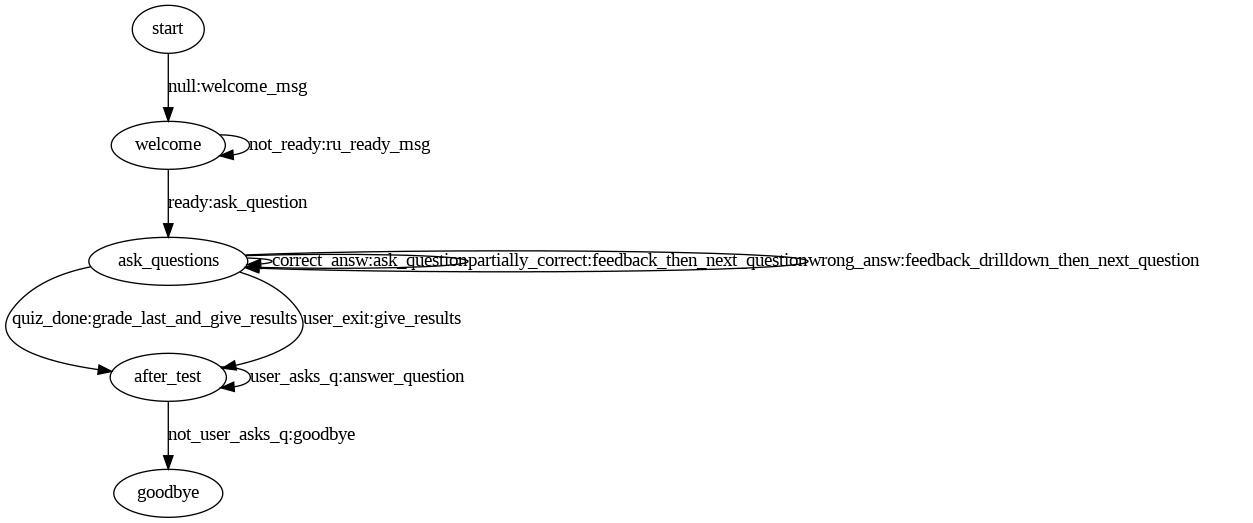

In [6]:
# this is the output
from IPython.display import Image
Image('quiz.png')


## GraphViz as FST For Dialogs

FSTFlowchat uses finite state transducers to implement a dialog system. An FST is a graph that consumes input and generates output as it moves from state to state. In this way of representing the dialog as a graph, the edges do most of the work.  In the theoretical specification of finite state transducers (FSTs), the edge labels have the form input:output or input:output:probability.  

In the way that FSTFlowChat implemented them, the input label is a python function that tests the input.  If the input can make a valid transition to the next state, then it will return true, otherwise false.  The output is a function that returns the output, i.e. what the system says. It also takes the input as an argument and returns a string.

FSTFlowChat can be used to iteratively develop a dialog system by specifying a graph and then programming the edge functions. The graph serves as a sketch to see the big picture and FSTFlowChat can automatically check the graph, look at the python environment, and say whether all the edges are implemented as python functions.

We'll include the graph in the notebook instead of using a dot file so that it's clearer.

In [11]:
graph_dot = """
digraph Quiz {
  start -> welcome                [label="null:welcome_msg", lblstyle="rotate=20"]
  welcome -> welcome              [label="not_ready:ru_ready_msg"]
  welcome -> ask_questions        [label="ready:ask_question"]
  ask_questions -> ask_questions  [label="correct_answ:ask_question"]
  ask_questions -> ask_questions  [label="partially_correct:feedback_then_next_question"]
  ask_questions -> ask_questions  [label="wrong_answ:feedback_drilldown_then_next_question"]
  ask_questions -> after_test     [label="quiz_done:grade_last_and_give_results"]
  ask_questions -> after_test     [label="user_exit:give_results"]
  after_test    -> after_test     [label="user_asks_q:answer_question"]
  after_test    -> goodbye        [label="not_user_asks_q:goodbye"]

}
"""

### graphs

The [Graph class](https://github.com/abecode/fstflowchat/blob/main/src/fstflowchat/__init__.py#L27) in FSTFlowChat is just a subclass of pygraphviz.AGraph. Below we load the dot file and visualize it, this time as SVG:



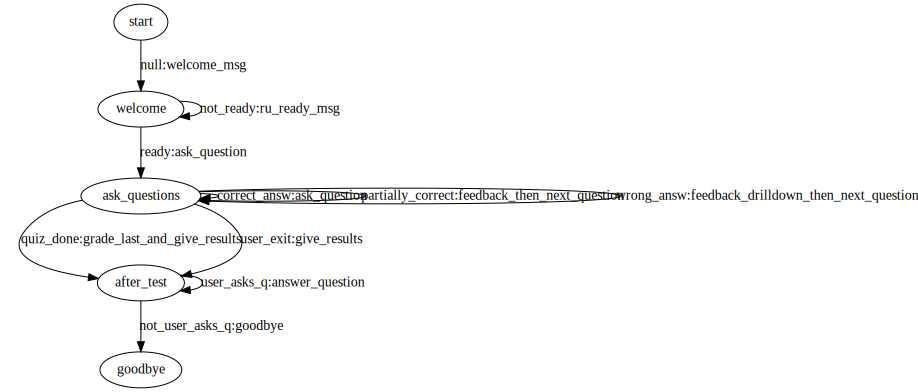

In [12]:
graph = ffc.Graph(graph_dot)
graph.layout(prog="dot")
graph.draw('library_help.svg')
from IPython.display import SVG
SVG('library_help.svg')

FSTFlowChat can to go through the edges of the graph and check to see if the edge functions have been implemented. To do this, we use the `globals()` command to extract the global environoment/namespace.  We don't have any of the functionns implemented yet, so we can also print empty functions as a convenience:  

In [13]:
if not graph.check_implementation(env=globals()):
  graph.check_implementation(verbose=True, env=globals())

# null for edge ('start', 'welcome') is not implemented
def null(input_: str) -> bool:
    """please implement this function"""

# welcome_msg for edge ('start', 'welcome') is not implemented
def welcome_msg(input_: str) -> str:
    """please implement this function"""

# not_ready for edge ('welcome', 'welcome') is not implemented
def not_ready(input_: str) -> bool:
    """please implement this function"""

# ru_ready_msg for edge ('welcome', 'welcome') is not implemented
def ru_ready_msg(input_: str) -> str:
    """please implement this function"""

# ready for edge ('welcome', 'ask_questions') is not implemented
def ready(input_: str) -> bool:
    """please implement this function"""

# ask_question for edge ('welcome', 'ask_questions') is not implemented
def ask_question(input_: str) -> str:
    """please implement this function"""

# correct_answ for edge ('ask_questions', 'ask_questions') is not implemented
def correct_answ(input_: str) -> bool:
    """please implement this funct

In [22]:
def null(input_: str) -> bool:
    """this null transition will be true for any arguments, or no input

    It's not quite the same as a null transition in an FST, but it's a
    similar idea

    """
    return True

def welcome_msg(input_: str) -> str:
    return "hi, are you ready to take a quiz?"

def ready(input_: str) -> bool:
    """This will return true if the user says "yes" or "ready"
    """
    if "yes" in input_.lower():
        return True
    if "ready" in input_.lower():
        return True
    return False

def not_ready(input_: str) -> bool:
    return not ready(input_)

def ru_ready_msg(input_: str) -> str:
    return "if you're ready, say \"yes\" or \"ready\""

def ask_question(input_:str) -> str:
    question_to_ask = questions.pop(0)
    previous_questions.append(question_to_ask)
    return question_to_ask.text()

def quiz_done_or_user_exit(input_: str) -> bool:
    if quiz_done(input_):
        return True
    if user_exit(input_):
        return True
    return False

def not_quiz_done_or_user_exit(input_: str) -> bool:
    return not quiz_done_or_user_exit(input_)

def intercept_decorator(condition):
    def decorator(f):
        def inner(input_):
            return condition(input_) and f(input_)
        return inner
    return decorator

@intercept_decorator(not_quiz_done_or_user_exit)
def correct_answ(input_:str) -> bool:
    global correct_count
    ##if score_answer(previous_questions[-1], input_) == "correct":
    if previous_questions[-1].score_answer(input_) == "correct":
        correct_count += 1
        return True
    return False

@intercept_decorator(not_quiz_done_or_user_exit)
def wrong_answ(input_:str) -> bool:
    global incorrect_count
    if previous_questions[-1].score_answer(input_) == "incorrect":
        incorrect_count += 1
        return True
    return False

@intercept_decorator(not_quiz_done_or_user_exit)
def partially_correct(input_: str) -> bool:
    global partial_count
    if previous_questions[-1].score_answer(input_) == "partial":
        partial_count += 1
        return True
    return False

def feedback_then_next_question(input_: str) -> str:
    return "eh, that was a so-so answer. \n" + ask_question(input_)

def feedback_drilldown_then_next_question(input_: str) -> str:
    return "wrong, pay more attention to lectures and reading\n" + ask_question(input_)

def quiz_done(input_: str) -> bool:
    if len(questions) == 0:
        return True
    return False

def user_exit(input_: str) -> bool:
    if "exit" in input_.lower():
        return True
    if "quit" in input_.lower():
        return True
    if "this sucks" in input_.lower():
        return True
    return False


def give_results(input_: str) -> str:
    return f"You got {correct_count} right, {incorrect_count} wrong, and {partial_count} partially correct"

def user_asks_q(input_: str) -> bool:
    if input_.endswith("?"):
        return True
    return False

def answer_question(input_: str) -> str:
    return "I'm sorry, I don't know how to answer that.  Let's just say bye and finish this."

@intercept_decorator(not_quiz_done_or_user_exit)
def wrong_answ(input_:str) -> bool:
    global incorrect_count
    if previous_questions[-1].score_answer(input_) == "incorrect":
        incorrect_count += 1
        return True
    return False

@intercept_decorator(not_quiz_done_or_user_exit)
def partially_correct(input_: str) -> bool:
    global partial_count
    if previous_questions[-1].score_answer(input_) == "partial":
        partial_count += 1
        return True
    return False

def feedback_then_next_question(input_: str) -> str:
    return "eh, that was a so-so answer. \n" + ask_question(input_)

def feedback_drilldown_then_next_question(input_: str) -> str:
    return "wrong, pay more attention to lectures and reading\n" + ask_question(input_)

def quiz_done(input_: str) -> bool:
    if len(questions) == 0:
        return True
    return False

def user_exit(input_: str) -> bool:
    if "exit" in input_.lower():
        return True
    if "quit" in input_.lower():
        return True
    if "this sucks" in input_.lower():
        return True
    return False


def give_results(input_: str) -> str:
    return f"You got {correct_count} right, {incorrect_count} wrong, and {partial_count} partially correct"

def user_asks_q(input_: str) -> bool:
    if input_.endswith("?"):
        return True
    return False

def answer_question(input_: str) -> str:
    return "I'm sorry, I don't know how to answer that.  Let's just say bye and finish this."

def answer_question(input_: str) -> str:
    return "I'm sorry, I don't know how to answer that.  Let's just say bye and finish this."

def grade_last_and_give_results(input_: str) -> bool:
    """this is is for the last question in the list, only for when we
    transition from ask_questions to after_test

    """
    output_ = ""
    global correct_count, partial_count, incorrect_count
    res = previous_questions[-1].score_answer(input_)
    if res == "correct":
        correct_count += 1
    if res == "partial":
        partial_count += 1
        output_ = "eh, that was a so-so answer. \n"
    if res == "incorrect":
        incorrect_count += 1
        output_ = "wrong, pay more attention to lectures and reading\n"

    return output_ + give_results(input_)

def not_user_asks_q(input_: str) -> bool:
    return not user_asks_q(input_)

def goodbye(input_: str) -> str:
    return "goodbye, thanks for testing the dialog system!"


Now, if we run the `check_implementation` again, we should see that all the functions are implemented so there won't be any output this time:

In [23]:
if not graph.check_implementation(env=globals()):
  graph.check_implementation(verbose=True, env=globals())

👏

I'm using python type hints.  That may or not be new to you but it's a way to make python more clear and safe by giving the input and output types for functions.

There's one example of a decorator.  This is used to check multiple conditions (checking the answer and also that the quiz questions are not done)

### FST

The FST class in FSTFlowChat implements the basic dialog functions. However the functions we just defined are in the global environment/namespace, so we'll need to pass this with the `globals()` function again. 

We can also add other variables to the global namespace. The FST will have access to these, so it will not be a pure FST because it has more information than just it's current state.  To illustrate this, we'll have a quiz demo, where we'll define three questions and functions to grade the questions:

In [24]:

# set up variables used for the quiz questions and keeping track of them

# set up the correct answer counts
correct_count = 0
partial_count = 0
incorrect_count = 0

from typing import Callable # used for function type hints

class QuizQuestion():
    def __init__(self, question: str, score_fn: Callable[[str], str]):
        """ a quiz question has a question and a function to score it"""
        self._question = question
        self._score_fn = score_fn
    def score_answer(self, answer) -> str:
        """ call the scoring function"""
        return self._score_fn(answer)
    def text(self):
        """ getter for question text string """
        return self._question

# set up the quiz questions
q1 = "Do you know what a database is?"
def is_affirmative(input_: str) -> bool:
  """ this is oversimplified, just a demo"""
  if "yes" in input_.lower():
    return True
  return False
def grade_q1(ans: str) -> str:
    if is_affirmative(ans):
        return "correct"
    return "incorrect"

q2 = "Is SELECT in DML or DDL?"
def grade_q2(ans: str) -> str:
    if "DDL" in ans:
        return "incorrect"
    if "DML" in ans:
        return "correct"
    else:
        return "partial"
        
q3 = "Briefly describe sixth normal form (6NF)."
def grade_q3(ans: str) -> str:
    return "partial"

questions = [QuizQuestion(q1, grade_q1),
             QuizQuestion(q2, grade_q2),
             QuizQuestion(q3, grade_q3)]
previous_questions = []




Okay, now we are pretty much good to go.  Now we just need to create the [FST class](https://github.com/abecode/fstflowchat/blob/main/src/fstflowchat/__init__.py#L68) by giving it the graph, the start state, the end state, and the global environment:

In [28]:
agent = ffc.FST(graph, "start", "goodbye", globals())

Now test the dialog system...

In [29]:
agent.run()

{
  "current_state": "start",
  "input_": "",
  "edges": [
    {
      "to": "start",
      "from": "welcome",
      "transition_fn": "null",
      "output_fn": "welcome_msg",
      "valid": true
    }
  ],
  "next_state": "welcome",
  "output": "hi, are you ready to take a quiz?"
}

hi, are you ready to take a quiz?

yes


{
  "current_state": "welcome",
  "input_": "yes",
  "edges": [
    {
      "to": "welcome",
      "from": "welcome",
      "transition_fn": "not_ready",
      "output_fn": "ru_ready_msg",
      "valid": false
    },
    {
      "to": "welcome",
      "from": "ask_questions",
      "transition_fn": "ready",
      "output_fn": "ask_question",
      "valid": true
    }
  ],
  "next_state": "ask_questions",
  "output": "Do you know what a database is?"
}

Do you know what a database is?

no


{
  "current_state": "ask_questions",
  "input_": "no",
  "edges": [
    {
      "to": "ask_questions",
      "from": "ask_questions",
      "transition_fn": "correct_answ",
      "output_fn": "ask_question",
      "valid": false
    },
    {
      "to": "ask_questions",
      "from": "ask_questions",
      "transition_fn": "partially_correct",
      "output_fn": "feedback_then_next_question",
      "valid": false
    },
    {
      "to": "ask_questions",
      "from": "ask_questions",
      "transition_fn": "wrong_answ",
      "output_fn": "feedback_drilldown_then_next_question",
      "valid": true
    },
    {
      "to": "ask_questions",
      "from": "after_test",
      "transition_fn": "quiz_done",
      "output_fn": "grade_last_and_give_results",
      "valid": false
    },
    {
      "to": "ask_questions",
      "from": "after_test",
      "transition_fn": "user_exit",
      "output_fn": "give_results",
      "valid": false
    }
  ],
  "next_state": "ask_questions",
  "output": "wrong, pay more attention to lectures and reading\nIs SELECT in DML or DDL?"
}

wrong, pay more attention to lectures and reading
Is SELECT in DML or DDL?

I don't know


{
  "current_state": "ask_questions",
  "input_": "I don't know",
  "edges": [
    {
      "to": "ask_questions",
      "from": "ask_questions",
      "transition_fn": "correct_answ",
      "output_fn": "ask_question",
      "valid": false
    },
    {
      "to": "ask_questions",
      "from": "ask_questions",
      "transition_fn": "partially_correct",
      "output_fn": "feedback_then_next_question",
      "valid": true
    },
    {
      "to": "ask_questions",
      "from": "ask_questions",
      "transition_fn": "wrong_answ",
      "output_fn": "feedback_drilldown_then_next_question",
      "valid": false
    },
    {
      "to": "ask_questions",
      "from": "after_test",
      "transition_fn": "quiz_done",
      "output_fn": "grade_last_and_give_results",
      "valid": false
    },
    {
      "to": "ask_questions",
      "from": "after_test",
      "transition_fn": "user_exit",
      "output_fn": "give_results",
      "valid": false
    }
  ],
  "next_state": "ask_questions",
  "output": "eh, that was a so-so answer. \nBriefly describe sixth normal form (6NF)."
}

eh, that was a so-so answer. 
Briefly describe sixth normal form (6NF).

something something Codd


{
  "current_state": "ask_questions",
  "input_": "something something Codd",
  "edges": [
    {
      "to": "ask_questions",
      "from": "ask_questions",
      "transition_fn": "correct_answ",
      "output_fn": "ask_question",
      "valid": false
    },
    {
      "to": "ask_questions",
      "from": "ask_questions",
      "transition_fn": "partially_correct",
      "output_fn": "feedback_then_next_question",
      "valid": false
    },
    {
      "to": "ask_questions",
      "from": "ask_questions",
      "transition_fn": "wrong_answ",
      "output_fn": "feedback_drilldown_then_next_question",
      "valid": false
    },
    {
      "to": "ask_questions",
      "from": "after_test",
      "transition_fn": "quiz_done",
      "output_fn": "grade_last_and_give_results",
      "valid": true
    },
    {
      "to": "ask_questions",
      "from": "after_test",
      "transition_fn": "user_exit",
      "output_fn": "give_results",
      "valid": false
    }
  ],
  "next_state": "after_test",
  "output": "eh, that was a so-so answer. \nYou got 0 right, 1 wrong, and 2 partially correct"
}

eh, that was a so-so answer. 
You got 0 right, 1 wrong, and 2 partially correct

ok


{
  "current_state": "after_test",
  "input_": "ok",
  "edges": [
    {
      "to": "after_test",
      "from": "after_test",
      "transition_fn": "user_asks_q",
      "output_fn": "answer_question",
      "valid": false
    },
    {
      "to": "after_test",
      "from": "goodbye",
      "transition_fn": "not_user_asks_q",
      "output_fn": "goodbye",
      "valid": true
    }
  ],
  "next_state": "goodbye",
  "output": "goodbye, thanks for testing the dialog system!"
}

goodbye, thanks for testing the dialog system!

bye


no valid transitions


NameError: ignored